<a href="https://colab.research.google.com/github/nitrogenlab/oceanography_colab_notebooks/blob/master/ProcessSantaBarabaraData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
%cd /content/drive/MyDrive/Research/mbari_nitrite/SantaBarbaraData/SakamotoCalcs

/content/drive/MyDrive/Research/mbari_nitrite/SantaBarbaraData/SakamotoCalcs


In [17]:
!ls



figures		       SBB004_eno3.mat	     SBB008_tfit.mat
NO3_SBB001c.txt        SBB004_no3data.mat    SBB008_wl.mat
NO3_SBB002c.txt        SBB004_tfit.mat	     SBB009_absbrtcor.mat
NO3_SBB004.txt	       SBB004_wl.mat	     SBB009_abscor.mat
NO3_SBB005.txt	       SBB005_absbrtcor.mat  SBB009_eno3.mat
NO3_SBB006.txt	       SBB005_abscor.mat     SBB009_no3data.mat
NO3_SBB007.txt	       SBB005_eno3.mat	     SBB009_tfit.mat
NO3_SBB008.txt	       SBB005_no3data.mat    SBB009_wl.mat
NO3_SBB009.txt	       SBB005_tfit.mat	     SBB010_absbrtcor.mat
NO3_SBB010.txt	       SBB005_wl.mat	     SBB010_abscor.mat
NO3_SBB011.txt	       SBB006_absbrtcor.mat  SBB010_eno3.mat
NO3_SBB012.txt	       SBB006_abscor.mat     SBB010_no3data.mat
SBB001c_absbrtcor.mat  SBB006_eno3.mat	     SBB010_tfit.mat
SBB001c_abscor.mat     SBB006_no3data.mat    SBB010_wl.mat
SBB001c_eno3.mat       SBB006_tfit.mat	     SBB011_absbrtcor.mat
SBB001c_no3data.mat    SBB006_wl.mat	     SBB011_abscor.mat
SBB001c_tfit.mat       SBB007_absb

In [42]:
from collections import namedtuple
import scipy
import scipy.io
import numpy as np

AbsData = namedtuple("AbsData", ["abs_cor", "abs_br_tcor", "wl", "tfit", "eno3",
                                 "pressure", "temperature",
                                 "salinity", "matlab_bl_intercept",
                                 "matlab_bl_slope", "matlab_no3",
                                 "upcast_mask"])
def read_abs_data(fileprefix):
  abs_cor = scipy.io.loadmat(fileprefix+"_abscor.mat")['abscor']
  abs_br_tcor = scipy.io.loadmat(fileprefix+"_absbrtcor.mat")['absbrtcor']
  wl = scipy.io.loadmat(fileprefix+"_wl.mat")['wl']
  tfit = scipy.io.loadmat(fileprefix+"_tfit.mat")['tfit']
  eno3 = scipy.io.loadmat(fileprefix+"_eno3.mat")['eno3']

  no3data = scipy.io.loadmat(fileprefix+"_no3data.mat")['no3data']

  pressure = no3data[:,2]
  temperature = no3data[:,3]
  salinity = no3data[:,4]
  no3 = no3data[:,5]
  bl_intercept = no3data[:,6]
  bl_slope = no3data[:,7]
  upcast_mask = np.array([False] + list(pressure[1:]-pressure[:-1] < 0))

  abs_data = AbsData(abs_cor=abs_cor, abs_br_tcor=abs_br_tcor,
                     wl=wl, tfit=tfit, eno3=eno3,
                     pressure=pressure, temperature=temperature,
                     salinity=salinity, matlab_no3=no3,
                     matlab_bl_intercept=bl_intercept,
                     matlab_bl_slope=bl_slope,
                     upcast_mask=upcast_mask)
  return abs_data

sbb004_absdata = read_abs_data("SBB004")

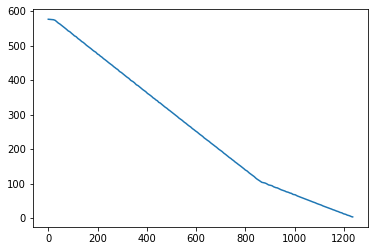

In [43]:
from matplotlib import pyplot as plt
plt.plot(sbb004_absdata.pressure[sbb004_absdata.upcast_mask])

In [86]:
from matplotlib import animation
from IPython.display import HTML

absdata = sbb004_absdata

# First set up the figure, the axis, and the plot element we want to animate
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].set_xlim(215, np.nanmax(absdata.wl))
ax[0].set_ylim((0, 0.1))
ax[1].plot(absdata.matlab_no3, -absdata.pressure)
line, = ax[0].plot([], [], lw=1)
scatter = ax[1].scatter([], [], color="red")

ax[1].set_ylabel("-pressure")
ax[1].set_xlabel("nitrate")
ax[0].set_ylabel("abs_cor - eno3*[NO3]")
ax[0].set_xlabel("wavelength")


# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line.set_data(absdata.wl[0],
                  absdata.abs_cor[i,:] - absdata.matlab_no3[i]*absdata.eno3)
    scatter.set_offsets([absdata.matlab_no3[i], -absdata.pressure[i]])
    ax[0].set_title("pressure: "+str(absdata.pressure[i]))
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=list(range(0,len(absdata.abs_cor), 20)),
                               interval=200, blit=True)

plt.close(anim._fig)

# Call function to display the animation
HTML(anim.to_html5_video())

In [71]:
absdata.matlab_no3.shape

(2700,)

In [54]:
sbb004_absdata.wl[-1] - sbb004_absdata.wl[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.